In [109]:
import matplotlib.pyplot as plt
import numpy as np

from StoCalc import *

# Stochastic Processes

### Modelling Weiner process 
Modelling a path with sparse approximation points

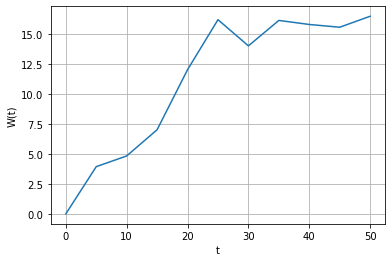

In [104]:
from StoCalc import weiner_process
np.random.seed(0)

T = 50
time1, proc1 = weiner_process(t0=0, T=T, m=1, N=11)

plt.grid()
plt.plot(time1, proc1[0])
plt.xlabel('t')
plt.ylabel('W(t)');

Adding more approximation points to existing path

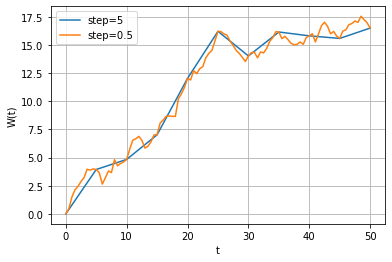

In [105]:
from StoCalc import brownian_bridge
new_points = np.arange(0, T, 0.5)
time2, proc2 = brownian_bridge(np.array([time1, proc1[0]]), new_points)

plt.plot(time1, proc1[0], label='step=5')
plt.plot(time2, proc2, label='step=0.5')
plt.grid()
plt.xlabel('t')
plt.ylabel('W(t)')
plt.legend();
plt.savefig('img/bridge05.png')

Modelling 1000 paths and ploting first 3 of them, their average and variance

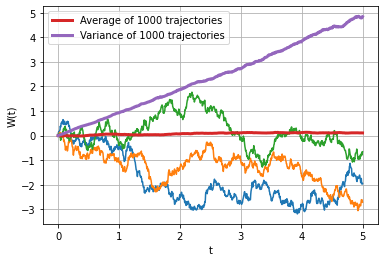

In [107]:
np.random.seed(0)

T = 5
time, proc = weiner_process(t0=0, T=T, m=1000, N=1000)

for p in proc[:3]:
    plt.plot(time, p)
plt.plot(time, proc.mean(axis=0), linewidth=3, label='Average of 1000 trajectories')
plt.plot(time, proc.var(ddof=1, axis=0), linewidth=3, label='Variance of 1000 trajectories')
plt.grid()

plt.xlabel('t')
plt.ylabel('W(t)');
plt.legend();

### Modelling Poisson process ($\lambda = 0.5$)
Modelling 1000 paths and ploting first 3 of them and their average

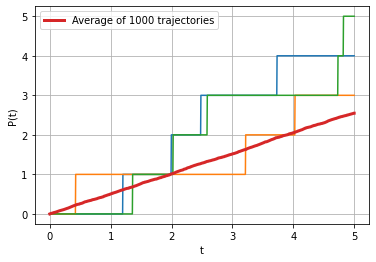

In [112]:
from StoCalc import poisson_process
np.random.seed(0)

T = 5
time, proc = poisson_process(t0=0, T=T, m=1000, N=1000, lam=1/2)

for p in proc[:3]:
    plt.plot(time, p)
plt.plot(time, proc.mean(axis=0), linewidth=3, label='Average of 1000 trajectories')
plt.grid()

plt.xlabel('t')
plt.ylabel('P(t)');
plt.legend();

# Stochastic integrals
Consider the following It̂o's stochastic integral:
$$
I(f) = \int_0^1 f(t, W(t)) dW(t) = \int_0^1 t\cdot e^{W(t)} dW(t)
$$
Calculate first 3 moments, i.e. E(I(f)), E(I²(f)), E(I³(f)), with step=0.01 and different sample size:

In [63]:
np.random.seed(0)
def f(t, Wt):
    return t * np.exp(Wt)

sample_sizes = (10, 100, 10000)
ks = (1, 2, 3)  # moment orders
for size in sample_sizes:
    tmp = [size]
    for k in ks:
        tmp.append(ito_int_expect(f, 0, 1, k, m=size))
    print(*[round(i, 3) for i in tmp], sep='\t')  

10	0.124	1.163	0.106
100	0.116	0.729	0.859
10000	0.009	1.291	5.864


Notice how the first moment is close to 0, as it should be

Generate 1000 samples, plot the first 3 of them, average and variance of trajectories:

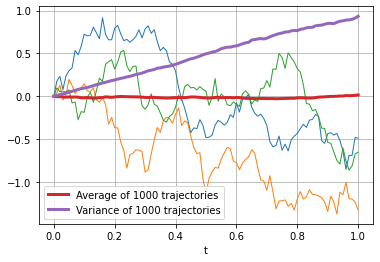

In [114]:
from StoCalc import ito_int_paths
np.random.seed(0)

time, paths = ito_int_paths(f, 0, 1, step=0.01, m=1000)

for p in paths[:3]:
    plt.plot(time, p, linewidth=1)
plt.plot(time, paths.mean(axis=0), linewidth=3, label='Average of 1000 trajectories')
plt.plot(time, paths.var(ddof=1, axis=0), linewidth=3, label='Variance of 1000 trajectories') 
plt.grid()
plt.xlabel('t')
plt.legend();

# Stochastic differential equations
Consider the following stochastic differential equation:
$$
\begin{cases} dY(t) = f\cdot dt + g\cdot dW(t)=\left( \frac{1}{4} Y(t) + \frac{1}{32}Y^2(t) \right)dt + \frac{1}{4}Y(t)dW(t),\ \\ Y(0) =\frac{1}{2} \end{cases}
$$
Obtain 1000 solutions using Euler's and Milstein's method and compare average of 1000 solutions for both methods with Scipy-provided solver for a corresponing determenistic ODE:

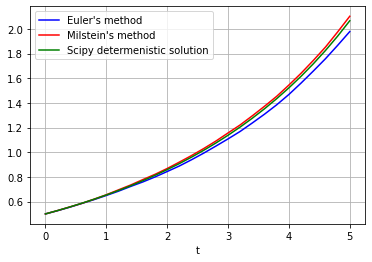

In [117]:
from StoCalc import sde
np.random.seed(0)

def dyE(y, dt, dW):
    f = 1/4 * y + 1/32 * y**2
    g = 1/4 * y
    return (f, g) 

def dyM(y, dt, dW):
    f = 1/4 * y + 1/32 * y**2
    g = 1/4 * y
    dgdy = 1/4   # need to provide additional derivative for Milstein's method
    return f, g, dgdy

y0 = 1/2
step = 1/5  # step size is large to see the difference between methods
t = (0, 5)

time, pathsE = sde(dyE, y0, t, step, method='euler')  # Euler's method
time, pathsM = sde(dyM, y0, t, step, method='milstein')  # Milstein's method

# determenistic equation
from scipy.integrate import odeint

def det_dydt(y, t):
    return 1/4 * y + 1/32 * y**2

sol = odeint(det_dydt, y0, time)

plt.plot(time, pathsE.mean(axis=0), color='blue', label="Euler's method")
plt.plot(time, pathsM.mean(axis=0), color='red', label="Milstein's method")
plt.plot(time, sol, color='green', label='Scipy determenistic solution')

plt.xlabel('t')
plt.grid()
plt.legend();